In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!unzip gdrive/MyDrive/Thyroid_dataset/adult.zip

Archive:  gdrive/MyDrive/Thyroid_dataset/adult.zip
  inflating: adult.csv               


In [ ]:
!unzip gdrive/MyDrive/Thyroid_dataset/hypothyroid.zip

Archive:  gdrive/MyDrive/Thyroid_dataset/hypothyroid.zip
  inflating: hypothyroid.csv         


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
dataset = pd.read_csv('hypothyroid.csv')
dataset.head()

,Unnamed: 0,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.7,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.2,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.4,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57,y,1.28,y,44,n,?


In [ ]:
data_copy = dataset.copy(deep = True)
data_copy.replace(to_replace='?', inplace=True, value=np.NaN)
print(data_copy.isnull().sum())

Unnamed: 0                      0
Age                           446
Sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_copy['Unnamed: 0'] = encoder.fit_transform(data_copy['Unnamed: 0'])
data_copy['Sex'] = data_copy['Sex'].replace({'M':0, 'F':1})
data_copy = data_copy.replace(to_replace={'f':0,'t':1, 'y':1, 'n':0})
print(data_copy.head())

   Unnamed: 0 Age  Sex  on_thyroxine  ...  FTI_measured  FTI  TBG_measured  TBG
0           0  72  0.0             0  ...             1   10             0  NaN
1           0  15  1.0             1  ...             1   17             0  NaN
2           0  24  0.0             0  ...             1    0             0  NaN
3           0  24  1.0             0  ...             1    6             0  NaN
4           0  77  0.0             0  ...             1   44             0  NaN

[5 rows x 26 columns]


In [ ]:
# Columns with dtype as 'object'
cols = data_copy.columns[data_copy.dtypes.eq('object')]
# Convert to numeric values
data_copy[cols] = data_copy[cols].apply(pd.to_numeric, errors='coerce')
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 3163 non-null   int64  
 1   Age                        2717 non-null   float64
 2   Sex                        3090 non-null   float64
 3   on_thyroxine               3163 non-null   int64  
 4   query_on_thyroxine         3163 non-null   int64  
 5   on_antithyroid_medication  3163 non-null   int64  
 6   thyroid_surgery            3163 non-null   int64  
 7   query_hypothyroid          3163 non-null   int64  
 8   query_hyperthyroid         3163 non-null   int64  
 9   pregnant                   3163 non-null   int64  
 10  sick                       3163 non-null   int64  
 11  tumor                      3163 non-null   int64  
 12  lithium                    3163 non-null   int64  
 13  goitre                     3163 non-null   int64

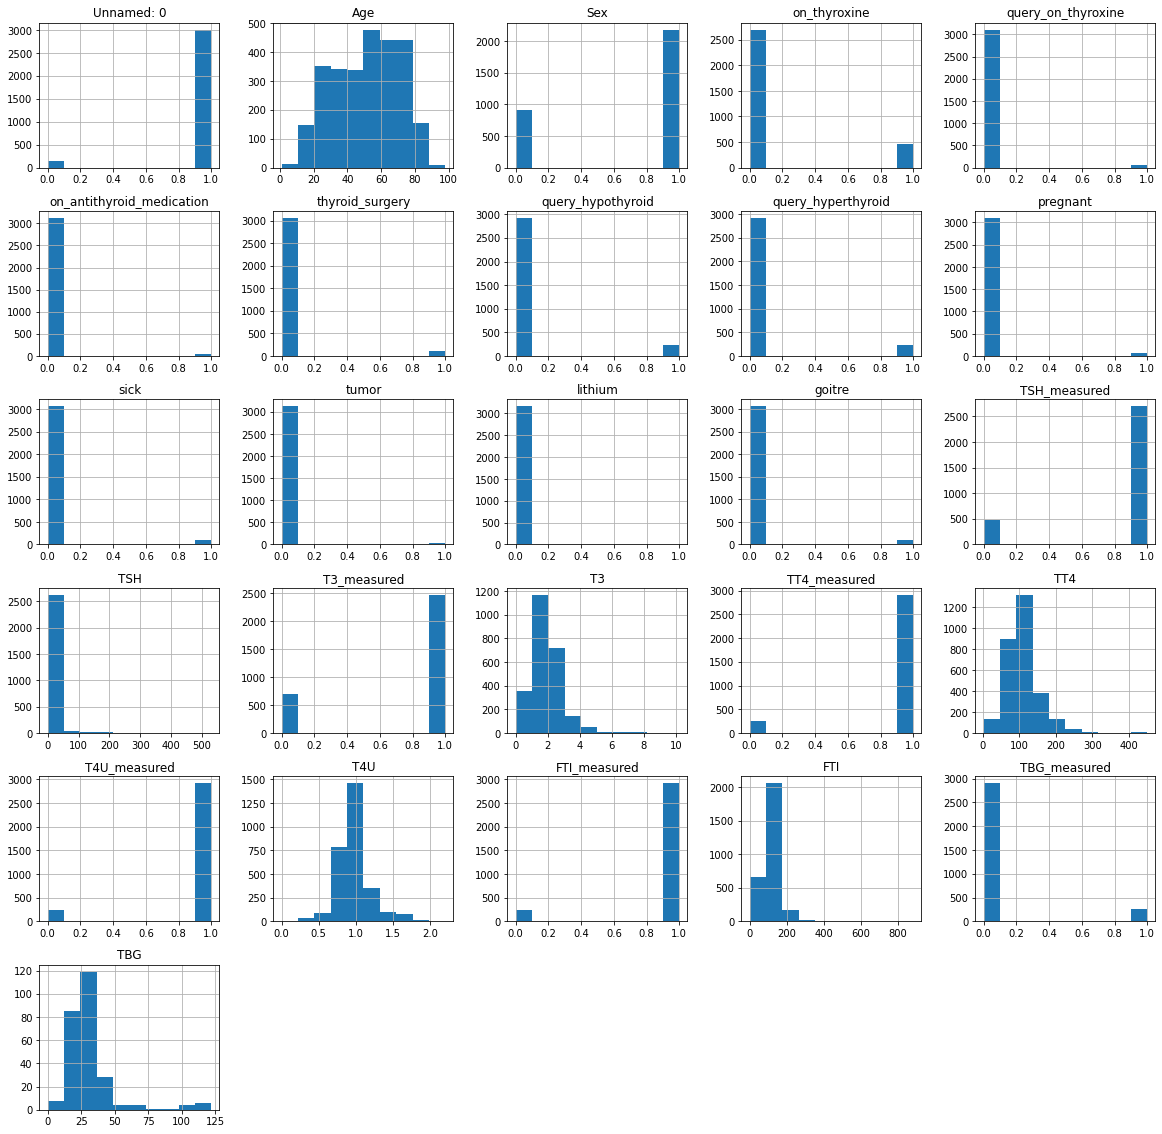

In [ ]:
p = data_copy.hist(figsize = (20,20))

In [ ]:
data_copy['Age'].fillna(data_copy['Age'].mean(), inplace = True)
data_copy['Sex'].fillna(0, inplace = True)
data_copy['TSH'].fillna(data_copy['TSH'].mean(), inplace = True)
data_copy['T3'].fillna(data_copy['T3'].median(), inplace = True)
data_copy['TT4'].fillna(data_copy['TT4'].median(), inplace = True)
data_copy['FTI'].fillna(data_copy['FTI'].median(), inplace = True)
data_copy['T4U'].fillna(data_copy['T4U'].mean(), inplace = True)
data_copy['TBG'].fillna(data_copy['TBG'].mean(), inplace = True)

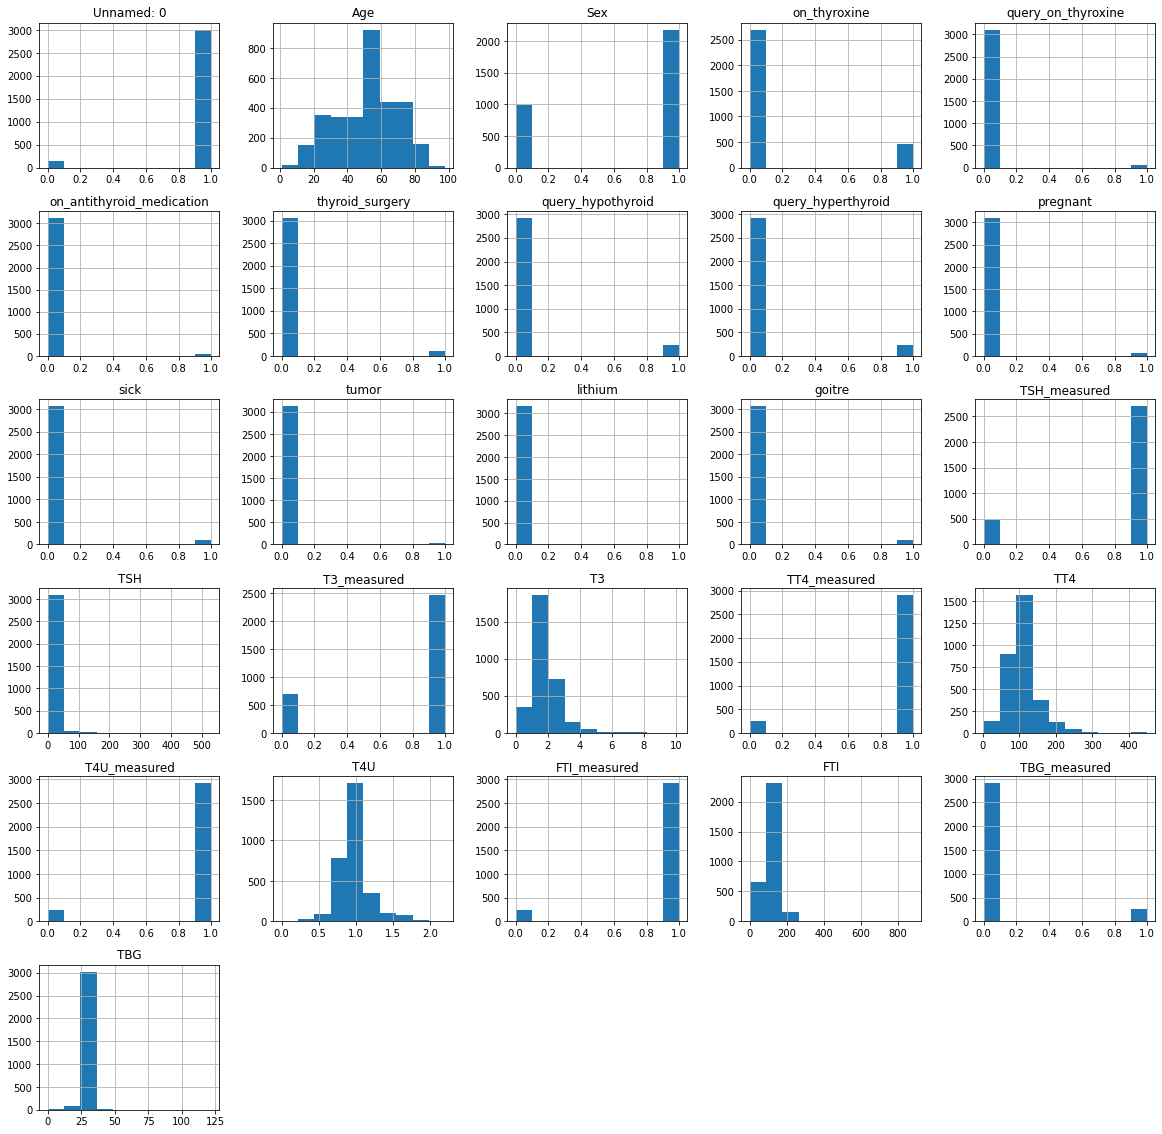

In [ ]:
p = data_copy.hist(figsize = (20,20))

In [ ]:
data_copy.isnull().sum()

Unnamed: 0                   0
Age                          0
Sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [ ]:
X = data_copy.iloc[:,1:]
Y = data_copy.iloc[:, 0]
print(X.shape, Y.shape)

(3163, 25) (3163,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)
print(X_train.shape, Y_train.shape)

(2530, 25) (2530,)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
import pickle
with open('scaler.obj', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

In [ ]:
model = Sequential()
model.add(Dense(64, kernel_initializer='uniform', input_dim=25, activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, epochs=50, validation_split=0.2, batch_size=40,  verbose=2)

Epoch 1/50
51/51 - 15s - loss: 0.6069 - accuracy: 0.9111 - val_loss: 0.4912 - val_accuracy: 0.9605
Epoch 2/50
51/51 - 0s - loss: 0.3567 - accuracy: 0.9575 - val_loss: 0.2272 - val_accuracy: 0.9644
Epoch 3/50
51/51 - 0s - loss: 0.1654 - accuracy: 0.9669 - val_loss: 0.1108 - val_accuracy: 0.9763
Epoch 4/50
51/51 - 0s - loss: 0.0985 - accuracy: 0.9713 - val_loss: 0.0752 - val_accuracy: 0.9842
Epoch 5/50
51/51 - 0s - loss: 0.0735 - accuracy: 0.9753 - val_loss: 0.0605 - val_accuracy: 0.9822
Epoch 6/50
51/51 - 0s - loss: 0.0627 - accuracy: 0.9788 - val_loss: 0.0534 - val_accuracy: 0.9842
Epoch 7/50
51/51 - 0s - loss: 0.0569 - accuracy: 0.9797 - val_loss: 0.0497 - val_accuracy: 0.9842
Epoch 8/50
51/51 - 0s - loss: 0.0533 - accuracy: 0.9802 - val_loss: 0.0474 - val_accuracy: 0.9822
Epoch 9/50
51/51 - 0s - loss: 0.0508 - accuracy: 0.9822 - val_loss: 0.0453 - val_accuracy: 0.9802
Epoch 10/50
51/51 - 0s - loss: 0.0487 - accuracy: 0.9812 - val_loss: 0.0439 - val_accuracy: 0.9802
Epoch 11/50
51/51 

In [ ]:
scores = model.evaluate(X_test, Y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


20/20 [==============================] - 0s 1ms/step - loss: 0.0563 - accuracy: 0.9826
accuracy: 98.26%


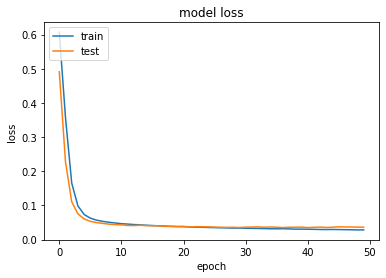

In [ ]:
import matplotlib.pyplot as plt

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.save('model.h5')